<h1 class="title">Test of significance for Pearson correlation coefficients</h1>

In [15]:
from bs4 import BeautifulSoup as BS
import numpy as np
import spacy
from FeatureExtraction.LexicalDiversity import get_ld_features, get_ld_features_dict, get_feature_matrix
from DataReader.XMLReader import XMLReader
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

<h3>1.1 Calculate pearson correlation coefficient and p-scores for both groups of features</h3>

In [22]:
feature_names = ['LV_W', 'LV_WT', 'LV_WT1', 'LV_TTR', 'LV_CTTR', 'LV_RTTR', 'LV_HDD', 'LV_DUGA', 'LV_MAAS', 'LV_SUMM',
                         'LV_YULEK','LV_MTLD','LV_MSTTR','LV_MATTR']
feature_names += ["LS_FPC_NG", "LS_FPC_NA", "LS_FPC_TC", "LS_FPC_BS", "LS_FPC_CA", "LS_FPC_CT", "LS_FPC_CGA1",
            "LS_FPC_CGA2", "LS_FPC_CGA3", "LS_FOMN_NG", "LS_FOMN_NA", "LS_FOMN_TC", "LS_FOMN_BS", "LS_FOMN_CA"]



feature_names = np.array(feature_names)

<h2>Level A1 (10 000 essays closest to the mean token count)</h2>

Top ten indicies:  [ 6  0  1  2  5  4 12 13 11  8]
Top ten indicies:  [15 20 24 16 17 21 18 14 19 27]
[1.00058738e-31 7.42913757e-30 2.81016132e-22 8.02784572e-12
 5.39639264e-10 5.39639264e-10 1.70705219e-03 2.22983377e-03
 5.86375559e-02 5.91118946e-02]
[2.64524844e-12 4.68356564e-09 4.55238341e-08 2.60475853e-06
 3.12513573e-03 5.73150054e-03 9.59322442e-03 1.13123162e-02
 1.18333664e-02 2.55924425e-02]


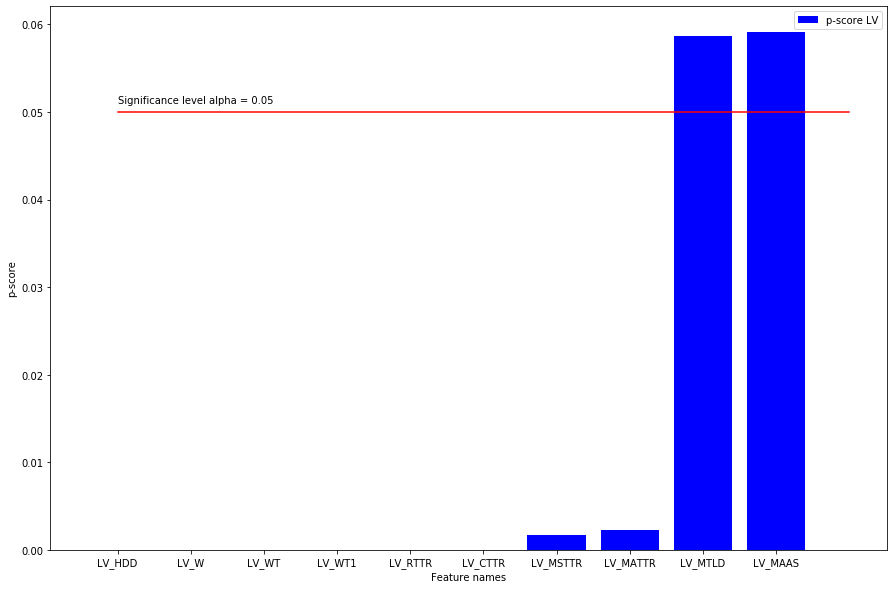

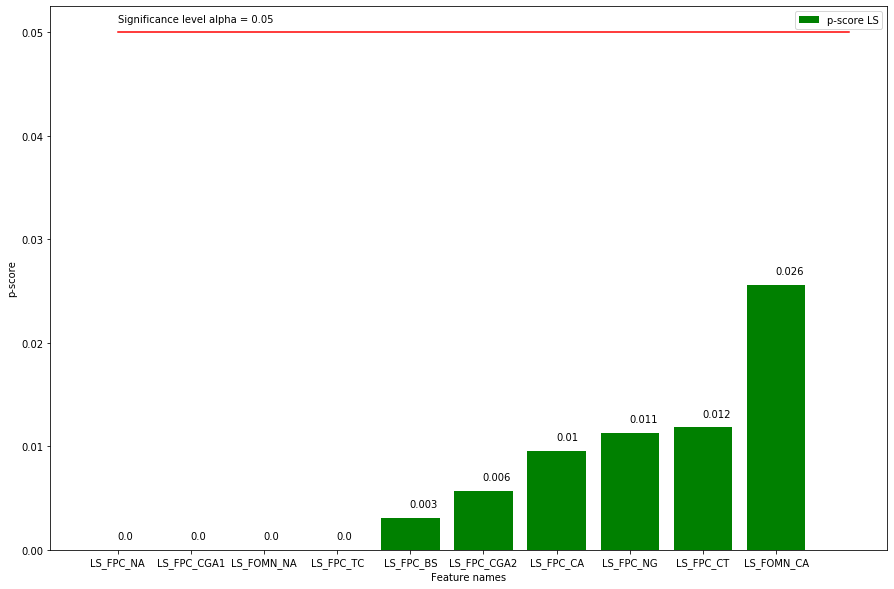

In [23]:

level="a1"

feature_matrix = np.load("level_" + level + "_fm.npy")
grades = np.load("level_" + level + "_grades.npy")

pearson_correlation_lv = []
p_scores_lv = []

pearson_correlation_ls = []
p_scores_ls = []

for column in feature_matrix[:, :14].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_lv.append(calcs[0])
    p_scores_lv.append(calcs[1])

pearson_correlation_lv = np.array(pearson_correlation_lv)
p_scores_lv = np.array(p_scores_lv)
    
top_ten_indices_lv = np.abs(pearson_correlation_lv).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_lv)


for column in feature_matrix[:, 14:].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_ls.append(calcs[0])
    p_scores_ls.append(calcs[1])

pearson_correlation_ls = np.array(pearson_correlation_ls)
p_scores_ls = np.array(p_scores_ls)

top_ten_indices_ls = np.abs(pearson_correlation_ls).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_ls+14)

print(p_scores_lv[top_ten_indices_lv])
print(p_scores_ls[top_ten_indices_ls])

ordinal_values = np.arange(0, 10, 1)

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_lv[top_ten_indices_lv], color="blue", label="p-score LV")
plt.plot((0, 10), (0.05, 0.05), "r-")
plt.text(0, 0.051, "Significance level alpha = 0.05")
#plt.text(0, 2e-23, "The significance level alpha = 0.05 was not \nplotted here because the scale of the values\n is very small. ")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_lv])
#for index, value in enumerate(p_scores_lv[top_ten_indices_lv]):
#    plt.text(index-0.01, value, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_ls[top_ten_indices_ls], color="green", label="p-score LS")
plt.plot((0, 10), (0.05, 0.05), "-", color="red")
plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_ls+14])

for index, value in enumerate(p_scores_ls[top_ten_indices_ls]):
    plt.text(index-0.01, value+0.001, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

<h2>Level A2 (10 000 essays closest to the mean token count)</h2>

Top ten indicies:  [13  1 10  6  5  4 12  9  8  3]
Top ten indicies:  [20 14 21 17 16 24 23 26 19 15]
[1.37618795e-15 1.98280798e-12 2.25784633e-12 2.34577006e-11
 4.03638172e-11 4.03638172e-11 7.34666078e-11 8.23800221e-11
 8.49994563e-11 5.42337121e-09]
[3.90109720e-10 9.31920752e-07 1.56376138e-04 1.50031906e-02
 2.63811456e-02 1.81078313e-01 2.46222418e-01 2.47653269e-01
 3.19989615e-01 3.96858091e-01]


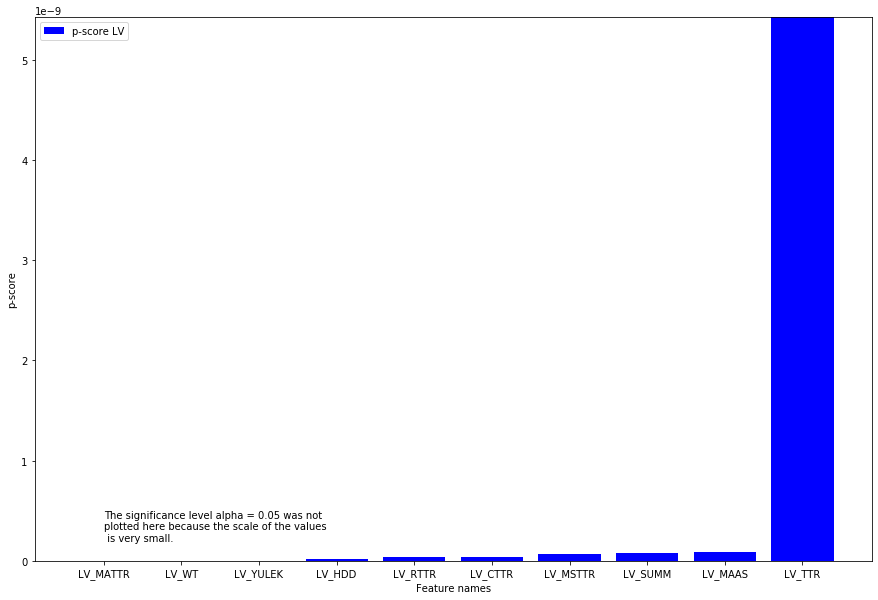

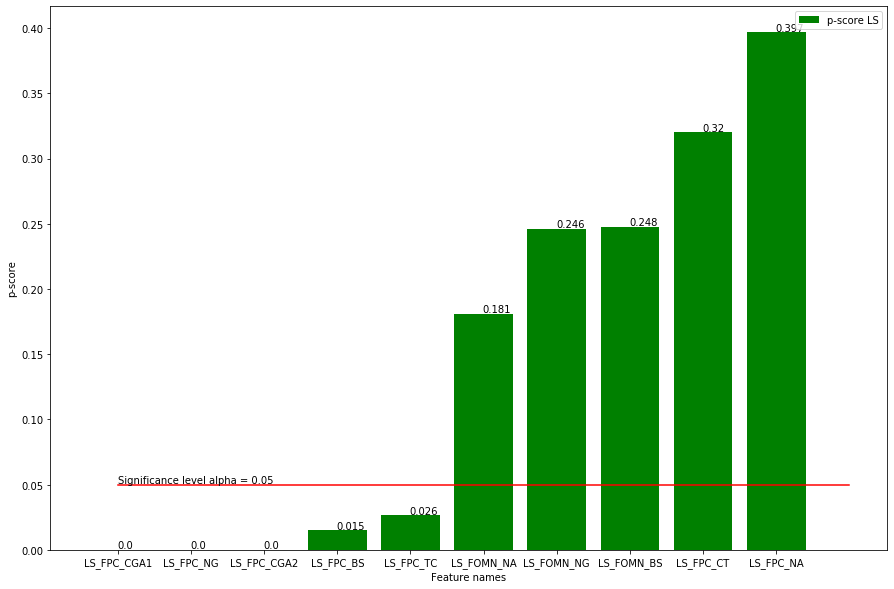

In [24]:
level="a2"

feature_matrix = np.load("level_" + level + "_fm.npy")
grades = np.load("level_" + level + "_grades.npy")

pearson_correlation_lv = []
p_scores_lv = []

pearson_correlation_ls = []
p_scores_ls = []

for column in feature_matrix[:, :14].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_lv.append(calcs[0])
    p_scores_lv.append(calcs[1])

pearson_correlation_lv = np.array(pearson_correlation_lv)
p_scores_lv = np.array(p_scores_lv)
    
top_ten_indices_lv = np.abs(pearson_correlation_lv).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_lv)


for column in feature_matrix[:, 14:].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_ls.append(calcs[0])
    p_scores_ls.append(calcs[1])

pearson_correlation_ls = np.array(pearson_correlation_ls)
p_scores_ls = np.array(p_scores_ls)

top_ten_indices_ls = np.abs(pearson_correlation_ls).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_ls+14)

print(p_scores_lv[top_ten_indices_lv])
print(p_scores_ls[top_ten_indices_ls])

ordinal_values = np.arange(0, 10, 1)

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_lv[top_ten_indices_lv], color="blue", label="p-score LV")
#plt.plot((0, 10), (0.05, 0.05), "r-")
#plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.text(0, 2e-10, "The significance level alpha = 0.05 was not \nplotted here because the scale of the values\n is very small. ")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_lv])
#for index, value in enumerate(p_scores_lv[top_ten_indices_lv]):
#    plt.text(index-0.01, value, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_ls[top_ten_indices_ls], color="green", label="p-score LS")
plt.plot((0, 10), (0.05, 0.05), "-", color="red")
plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_ls+14])

for index, value in enumerate(p_scores_ls[top_ten_indices_ls]):
    plt.text(index-0.01, value+0.001, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

<h2>Level B1 (10 000 essays closest to the mean token count)</h2>

Top ten indicies:  [ 9 10  0  8  3  6  4  5  7  2]
Top ten indicies:  [21 24 14 17 26 23 18 16 19 20]
[1.05675654e-11 1.54152827e-09 2.51541667e-09 6.73738637e-09
 5.50127115e-07 9.47930604e-05 5.00153961e-04 5.00153961e-04
 5.47418313e-04 2.20201723e-03]
[1.79744070e-07 3.47615111e-07 9.87353437e-07 5.11989206e-04
 1.12709334e-03 2.66082710e-03 2.82290996e-03 1.46687771e-02
 2.39570827e-02 4.20397247e-02]


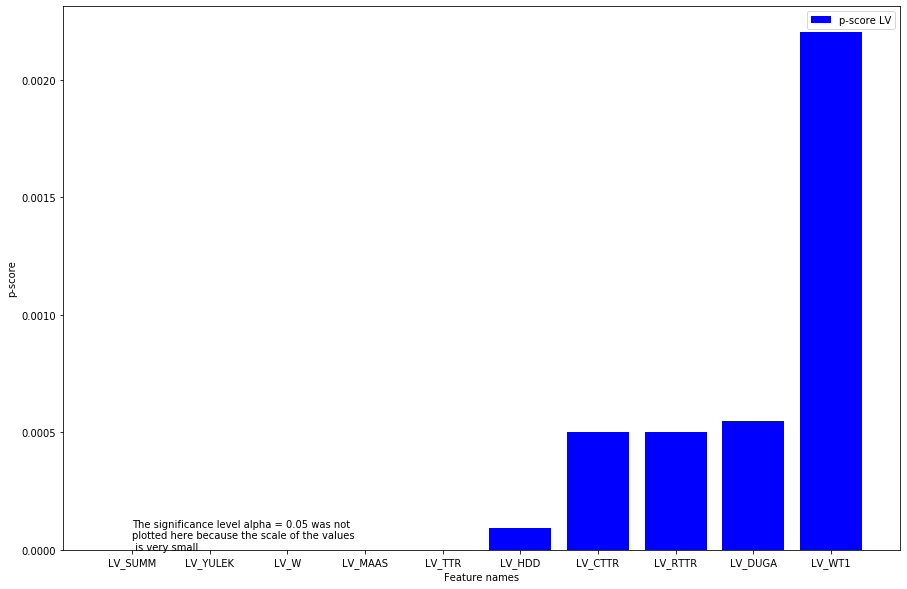

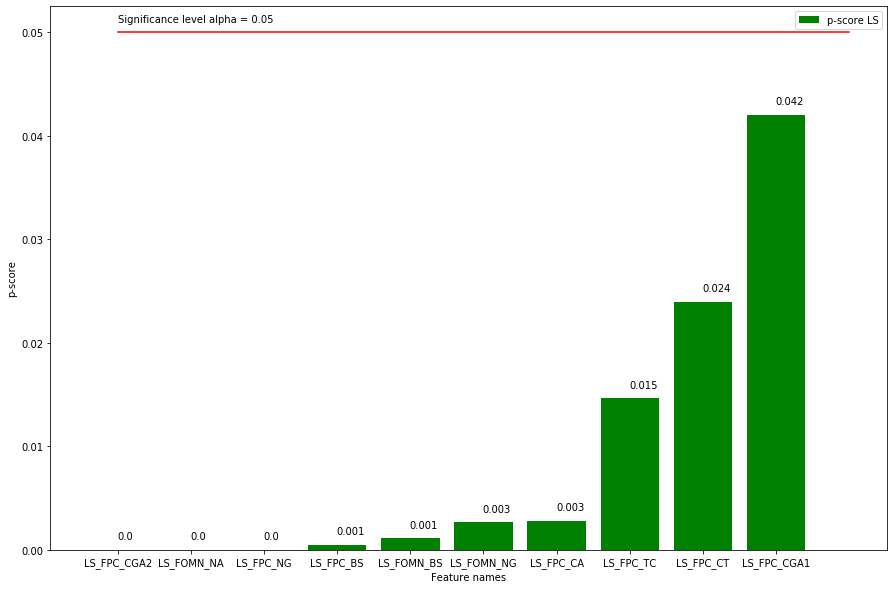

In [25]:
level="b1"

feature_matrix = np.load("level_" + level + "_fm.npy")
grades = np.load("level_" + level + "_grades.npy")

pearson_correlation_lv = []
p_scores_lv = []

pearson_correlation_ls = []
p_scores_ls = []

for column in feature_matrix[:, :14].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_lv.append(calcs[0])
    p_scores_lv.append(calcs[1])

pearson_correlation_lv = np.array(pearson_correlation_lv)
p_scores_lv = np.array(p_scores_lv)
    
top_ten_indices_lv = np.abs(pearson_correlation_lv).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_lv)


for column in feature_matrix[:, 14:].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_ls.append(calcs[0])
    p_scores_ls.append(calcs[1])

pearson_correlation_ls = np.array(pearson_correlation_ls)
p_scores_ls = np.array(p_scores_ls)

top_ten_indices_ls = np.abs(pearson_correlation_ls).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_ls+14)

print(p_scores_lv[top_ten_indices_lv])
print(p_scores_ls[top_ten_indices_ls])

ordinal_values = np.arange(0, 10, 1)

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_lv[top_ten_indices_lv], color="blue", label="p-score LV")
#plt.plot((0, 10), (0.05, 0.05), "r-")
#plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.text(0, 8e-8, "The significance level alpha = 0.05 was not \nplotted here because the scale of the values\n is very small. ")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_lv])
#for index, value in enumerate(p_scores_lv[top_ten_indices_lv]):
#    plt.text(index-0.01, value, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_ls[top_ten_indices_ls], color="green", label="p-score LS")
plt.plot((0, 10), (0.05, 0.05), "-", color="red")
plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_ls+14])

for index, value in enumerate(p_scores_ls[top_ten_indices_ls]):
    plt.text(index-0.01, value+0.001, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

<h2>Level B2 (10 000 essays closest to the mean token count)</h2>

Top ten indicies:  [ 3 11  9  7  8  2  5  4  0  6]
Top ten indicies:  [21 16 23 24 14 26 19 20 17 18]
[4.56213909e-06 1.31351955e-05 4.48974924e-05 4.63272383e-05
 6.39655674e-05 1.62316857e-04 4.71033144e-04 4.71033144e-04
 1.30178461e-03 4.97995179e-03]
[2.67437795e-13 5.43625474e-13 1.21588649e-08 1.17475677e-04
 2.99916775e-04 2.46857185e-03 8.05294659e-03 1.03446849e-02
 2.91221750e-02 4.62308912e-01]


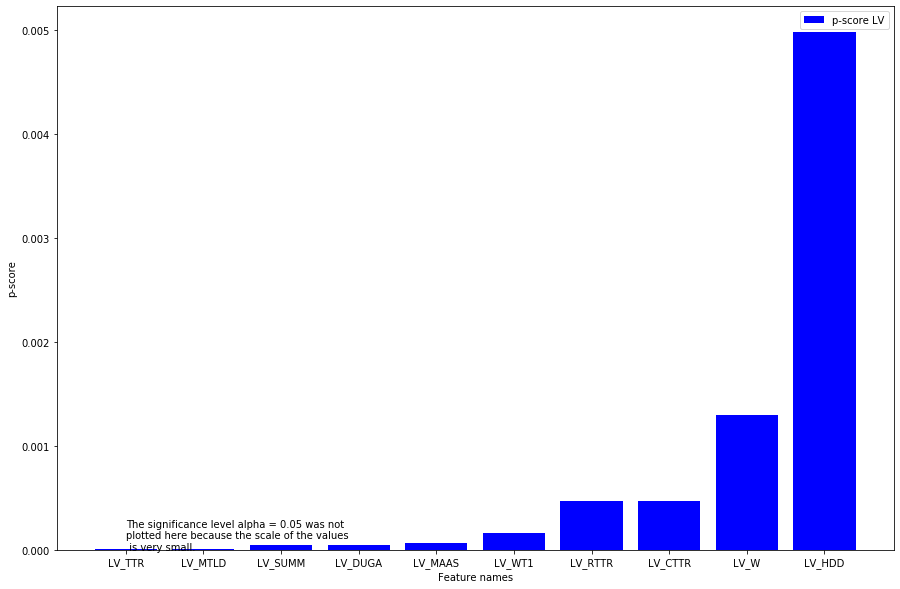

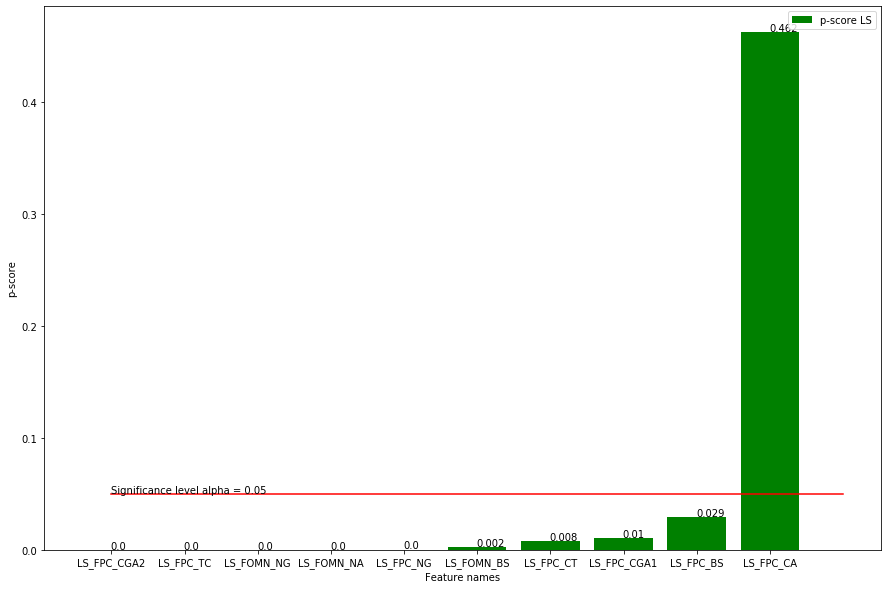

In [26]:
level="b2"

feature_matrix = np.load("level_" + level + "_fm.npy")
grades = np.load("level_" + level + "_grades.npy")

pearson_correlation_lv = []
p_scores_lv = []

pearson_correlation_ls = []
p_scores_ls = []

for column in feature_matrix[:, :14].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_lv.append(calcs[0])
    p_scores_lv.append(calcs[1])

pearson_correlation_lv = np.array(pearson_correlation_lv)
p_scores_lv = np.array(p_scores_lv)
    
top_ten_indices_lv = np.abs(pearson_correlation_lv).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_lv)


for column in feature_matrix[:, 14:].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_ls.append(calcs[0])
    p_scores_ls.append(calcs[1])

pearson_correlation_ls = np.array(pearson_correlation_ls)
p_scores_ls = np.array(p_scores_ls)

top_ten_indices_ls = np.abs(pearson_correlation_ls).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_ls+14)

print(p_scores_lv[top_ten_indices_lv])
print(p_scores_ls[top_ten_indices_ls])

ordinal_values = np.arange(0, 10, 1)

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_lv[top_ten_indices_lv], color="blue", label="p-score LV")
#plt.plot((0, 10), (0.05, 0.05), "r-")
#plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.text(0, 2e-14, "The significance level alpha = 0.05 was not \nplotted here because the scale of the values\n is very small. ")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_lv])
#for index, value in enumerate(p_scores_lv[top_ten_indices_lv]):
#    plt.text(index-0.01, value, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_ls[top_ten_indices_ls], color="green", label="p-score LS")
plt.plot((0, 10), (0.05, 0.05), "-", color="red")
plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_ls+14])

for index, value in enumerate(p_scores_ls[top_ten_indices_ls]):
    plt.text(index-0.01, value+0.001, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

<h2>Level C1 (10 000 essays closest to the mean token count)</h2>

Top ten indicies:  [ 9  4  5  2 13 12  1  7  3  8]
Top ten indicies:  [16 17 18 14 23 19 15 22 24 20]
[3.99596373e-13 5.55828101e-13 5.55828101e-13 2.36412747e-12
 3.91507178e-12 4.54619651e-11 5.20326235e-11 2.27009973e-10
 2.74479614e-10 3.23988672e-10]
[5.93109054e-12 3.66611495e-10 2.24335069e-08 1.30577024e-06
 7.47176326e-05 2.00474942e-04 4.25796374e-02 4.37965738e-02
 5.12314618e-02 8.11574735e-02]


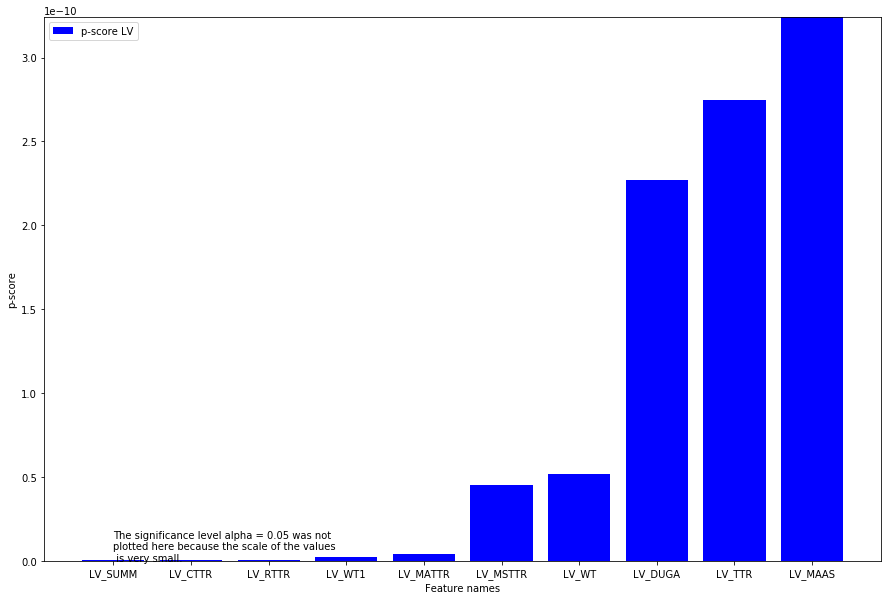

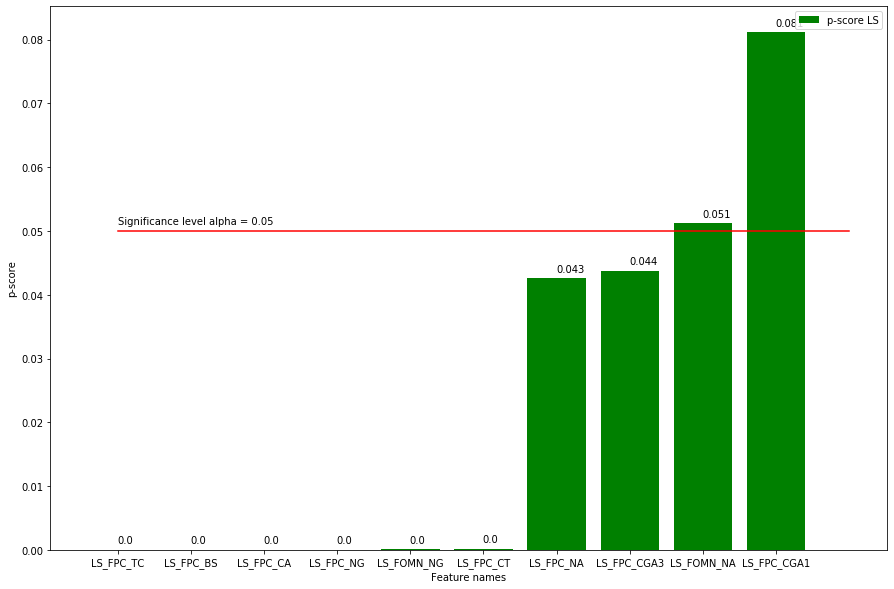

In [27]:
level="c1"

feature_matrix = np.load("level_" + level + "_fm.npy")
grades = np.load("level_" + level + "_grades.npy")

pearson_correlation_lv = []
p_scores_lv = []

pearson_correlation_ls = []
p_scores_ls = []

for column in feature_matrix[:, :14].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_lv.append(calcs[0])
    p_scores_lv.append(calcs[1])

pearson_correlation_lv = np.array(pearson_correlation_lv)
p_scores_lv = np.array(p_scores_lv)
    
top_ten_indices_lv = np.abs(pearson_correlation_lv).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_lv)


for column in feature_matrix[:, 14:].T:
    calcs = pearsonr(column, grades)
    pearson_correlation_ls.append(calcs[0])
    p_scores_ls.append(calcs[1])

pearson_correlation_ls = np.array(pearson_correlation_ls)
p_scores_ls = np.array(p_scores_ls)

top_ten_indices_ls = np.abs(pearson_correlation_ls).argsort()[-10:][::-1].astype("int32")
print("Top ten indicies: ", top_ten_indices_ls+14)

print(p_scores_lv[top_ten_indices_lv])
print(p_scores_ls[top_ten_indices_ls])

ordinal_values = np.arange(0, 10, 1)

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_lv[top_ten_indices_lv], color="blue", label="p-score LV")
#plt.plot((0, 10), (0.05, 0.05), "r-")
#plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.text(0, 2e-23, "The significance level alpha = 0.05 was not \nplotted here because the scale of the values\n is very small. ")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_lv])
#for index, value in enumerate(p_scores_lv[top_ten_indices_lv]):
#    plt.text(index-0.01, value, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.bar(ordinal_values, p_scores_ls[top_ten_indices_ls], color="green", label="p-score LS")
plt.plot((0, 10), (0.05, 0.05), "-", color="red")
plt.text(0, 0.051, "Significance level alpha = 0.05")
plt.xlabel("Feature names")
plt.xticks(ordinal_values, feature_names[top_ten_indices_ls+14])

for index, value in enumerate(p_scores_ls[top_ten_indices_ls]):
    plt.text(index-0.01, value+0.001, round(value, 3))

plt.ylabel("p-score")
plt.legend()
plt.show()